# Pryngles module

## Module base

Goals of the module:
- Future `base`
- Basic Classes and functions of the Class.
- It is based on existing infrastructure.

In [907]:
##HEADER
from pryngles import *
import unittest
#import rebound as rb
%load_ext autoreload
%autoreload 2

#Astronomical constants
import rebound as rb
from rebound.units import times_SI,lengths_SI,masses_SI

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1036]:
class Test(unittest.TestCase):
    from pryngles import _base

In [1037]:
class Object(PrynglesCommon):
    """
    Global class of object
    """
    def _updateChilds(self,child=None):
        if 'childs' not in self.__dict__:
            self.childs=[]
        if child is not None:
            self.childs+=[child]
    def _updateParent(self,parent=None):
        if 'parent' not in self.__dict__:
            self.parent=parent
        elif parent is not None:
            self.parent=parent

In [1038]:
def test_Object(self):
    obj=Object()
    obj._updateParent("parent")
    obj._updateChilds("child1")
    obj._updateChilds("child2")
    self.assertEqual([obj.parent],["parent"],True)
    self.assertEqual(obj.childs,["child1","child2"],True)
Test.test_Object=test_Object
#unittest.main(argv=['first-arg-is-ignored'],exit=False)

In [1039]:
def addStar(self,
                 hash=None,
                 center=None,
                 m=1,R=Const.Rsun/Const.au,
                 Prot=0.1,
                 N=1000,
             star=None
            ):
    """
    TO DEVELOPERS:
        This method is for the System class.  It is placed here because when a new parameter
        is added to the initializer of the addObject (being Object Star, Planet, etc.) class
        then the parameters of this ruotine should also change.
    """
    if star is not None:
        self._addObject("star","Star",star)
    else:
        self.stars+=[Star(hash,center,m,R,Prot,N)]
    self._updateSystem()
    return self.stars[-1]

class Star(Object):
    """
    Creates a star.
    """
    def __init__(self,
                 hash=None,
                 center=None,
                 m=1,R=Const.Rsun/Const.au,
                 Prot=0.1,
                 N=1000,
                ):
        #List of arguments: hash,center,m,r,Prot,N
        #Hash of the object
        self.hash=hash
        self.type="Star"

        #Center of the system (object)
        self.center=center
        if self.center is not None:
            self.center._updateChilds(self)
            self._updateParent(self.center)
        
        #Basic common properties
        self.m=m #mass [cu]
        self.R=R #radius [cu]

        #Dynamic parameters
        self.Prot=Prot

        #Sampling parameters
        self.N=N #number of spangles
        
        #Update properties
        self.updateObject(**self.__dict__)

    def updateObject(self,**props):
        self.__dict__.update(props)
        self._updateChilds()
        self._updateParent()

In [1040]:
def addPlanet(self,
                 hash=None,
                 center=None,
                 m=masses_SI["msaturn"]/masses_SI["msun"],R=Const.Rsat/Const.au,
                 a=0.2,e=0.6,
                 Prot=0.01,
                 N=1000,
             planet=None
            ):
    if planet is not None:
        self._addObject("planet","Planet",planet)
    else:
        self.planets+=[Planet(hash,center,m,R,a,e,Prot,N)]
    self._updateSystem()
    return self.planets[-1]

class Planet(Object):
    """
    Creates a star.
    """
    def __init__(self,
                 hash=None,
                 center=None,
                 m=masses_SI["msaturn"]/masses_SI["msun"],R=Const.Rsat/Const.au,
                 a=0.2,e=0.6,
                 Prot=0.01,
                 N=1000,
                ):
        #List of arguments: hash,center,m,R,a,e,Prot,N
        #Hash of the object
        self.hash=hash
        self.type="Planet"

        #Center of the system (object)
        if center is None:
            raise ValueError(f"You must provide a valid object for the center.  {center} provided")
        self.center=center
        self.center._updateChilds(self)
        self._updateParent(self.center)
        
        #Basic common properties
        self.m=m #mass [cu]
        self.R=R #radius [cu]

        #Dynamic parameters
        self.Prot=Prot
        
        #Orbital properties
        self.a=a
        self.e=e

        #Sampling parameters
        self.N=N #number of spangles
        
        #Update properties
        self.updateObject(**self.__dict__)
        
    def updateObject(self,**props):
        self.__dict__.update(props)
        self._updateChilds()
        self._updateParent()

In [1041]:
def addRing(self,
                 hash=None,
                 center=None,
                 fi=1.5,fe=2.5,
                 i=30*deg,
                 N=1000,
             ring=None
            ):
    if ring is not None:
        self._addObject("ring","Ring",ring)
    else:
        self.rings+=[Ring(hash,center,fi,fe,i,N)]
    self._updateSystem()
    return self.rings[-1]
    
class Ring(Object):
    """
    Creates a star.
    """
    def __init__(self,
                 hash=None,
                 center=None,
                 fi=1.5,fe=2.5,
                 i=0,
                 N=1000,
                ):
        #List of arguments: hash,center,fi,fe,i,N
        #Hash of the object
        self.hash=hash
        self.type="Ring"

        #Center of the system (object)
        if center is None:
            raise ValueError(f"You must provide a valid object for the center.  {center} provided")
        self.center=center
        self.center._updateChilds(self)
        self._updateParent(self.center)

        #Basic common properties
        self.fi=fi
        self.fe=fe
        
        #Orientation
        self.i=i

        #Sampling parameters
        self.N=N #number of spangles
        
        #Update properties
        self.updateObject(**self.__dict__)
        
    def updateObject(self,**props):
        self.__dict__.update(props)
        self._updateChilds()
        self._updateParent()
        
        #Derivative properties
        self.ri=self.fi*self.center.R
        self.re=self.fe*self.center.R

In [1056]:
def addObserver(self,
                 center=None,
                 beta=90*deg,lamb=90*deg,
             observer=None
            ):
    if observer is not None:
        self._addObject("observer","Observer",observer)
    else:
        self.observers+=[Observer(center,beta,lamb)]
    self._updateSystem()
    return self.observers[-1]
    
class Observer(Object):
    """
    Creates a star.
    """
    def __init__(self,
                 center=None,
                 beta=90*deg,lamb=90*deg,
                ):
        #List of arguments: center,beta,lamb
        #Hash of the object
        self.hash=hash
        self.type="Observer"

        #Center of the system (object)
        self.center=center
        if self.center is not None:
            self.center._updateChilds(self)
            self._updateParent(self.center)

        #Basic common properties
        self.beta=beta
        self.lamb=lamb

        #Update properties
        self.updateObject(**self.__dict__)
        
    def updateObject(self,**props):
        self.__dict__.update(props)
        self._updateChilds()
        self._updateParent()

In [1057]:
System_doc=\
"""
Creates a planetary system.

Examples:

    sys=System()
    sys=System(units=['msun','km','s'])
    sys=System(stars=dict(M=1,R=1))

Initialization (primary) attributes:

    units = ['msun','au','yr']: 
        Units used in calculations following the conventions and signs of rebound. List [3].
        
    stars = None: 
        Stars in the system.
    planets = None: 
        Planets in the system.
    rings = None: 
        Rings in the system.
    observers = None: 
        Observers in the system.
           
        NOTE: Objects are provided either by description or as an object. Those attributes can be lists or 
              a single value.
    
    rebound = True:
        Set True if you want to simulte the orbit of objects (for instance if you want to calculate
        TTVs).  If False it will calculate orbits using Keplerian dynamics.

Other Public (secondary) attributes:

    N: Number of objects in the system.
    No: Numeber of observers

Important private attributes:

    _sim: Rebound simulation object.
""";

In [1058]:
import rebound as rb
class System(PrynglesCommon):
    
    def __init__(self,
                 units=['au','yr','msun'],
                 stars=None,planets=None,rings=None,observers=None,
                 rebound=True
                ):
        
        #Initialize rebound
        self.units=units
        self._sim=rb.Simulation()
        self._sim.units=self.units
        self._ul,self._ut,self._um=self.units
        self.G=self._sim.G
        self.ul=rb.units.convert_length(1,self._ul,"m")
        self.um=rb.units.convert_mass(1,self._um,"kg")
        self.GSI=rb.units.convert_G(["m","s","kg"])
        self.ut=np.sqrt(self.ul**3/(self.um*self.GSI))

        #Add components
        self._list2Objects("stars","Star",stars)
        self._list2Objects("planets","Planet",planets)
        self._list2Objects("rings","Ring",rings)
        self._list2Objects("observers","Observer",observers)

        #Behavior
        self.rebound=True
        
        #Update system
        self._updateSystem()
        
    """
    #Freezer
    def addStar(self,star=None):
        self._addObject("star","Star",planet)
        self._updateSystem()
    
    def addPlanet(self,planet=None):
        self._addObject("planet","Planet",planet)
        self._updateSystem()
    
    def addRing(self,ring=None):
        self._addObject("ring","Ring",ring)
        self._updateSystem()
    """
    def _addObject(self,kind,objclass,obj):
        error=""
        try:
            obj.__dict__
            exec(f"self.{kind}s=self.{kind}s+[obj] if len(self.{kind}s)!=0 is not None else [obj]")
            cond=eval(f"obj.type!='{objclass}'")
            if cond:
                error=f"You cannot add a {objclass} with a {obj.type} object"
        except:
            exec(f"self.{kind}s+=self.{kind}s+[obj] if len(self.{kind}s)!=0 else [obj]")
        if error!="":
            exec(f"self.{kind}s.pop()")
            raise AssertionError(error)
        self._updateSystem()
    
    def _updateSystem(self):
        #Count components
        self.Nstars=self.Nplanets=self.Nrings=0
        for obj in "stars","planets","rings":
            exec(f"self.N{obj}=len(self.{obj})")
        self.N=self.Nstars+self.Nplanets+self.Nrings
        self.No=len(self.observers)
        
    def ensambleSystem(self):
        #Ensamble system
        #--CONSISTENCY--
        if self.Nstars==1 and self.Nplanets==1 and self.Nrings==1:
            #Create ringed planet
            self.G=self._sim.G
            
            self._ringedplanet=dict(
                #Behavior
                behavior=dict(shadows=True),
                #Units
                CU=CanonicalUnits(UL=sys.ul,UM=sys.um),
                #Basic
                Rstar=self.stars[0].R,Rplanet=self.planets[0].R,
                Rint=self.rings[0].fi,Rext=self.rings[0].fe,i=self.rings[0].i,
                a=self.planets[0].a,e=self.planets[0].e,
                #Orbit 
                Mstar=1,x=0,lambq=0,t0=0,kepler=False,
                #Observer
                eobs_ecl=np.array([self.observers[0].lamb,self.observers[0].beta]),
                #Sampling
                Np=self.planets[0].N,Nr=self.rings[0].N,Nb=100,Ns=30,
                #Physical properties
                physics=dict(
                    #Albedos
                    AS=0.5,AL=0.5,
                    #Ring geometrical opacity
                    taug=1.0, #Geometrical opacity
                    diffeff=1.0, #Diffraction efficiency
                    #Law of diffuse reflection on ring surface
                    reflection_rings_law=lambda x,y:x,
                    #Observations wavelength
                    wavelength=550e-9,
                    #Ring particle propeties (see French & Nicholson, 2000)
                    particles=dict(q=3,s0=100e-6,smin=1e-2,smax=1e2,Qsc=1,Qext=2),
                    #Stellar limb darkening
                    limb_cs=[0.6550],
                )
            )
            self.RP=RingedPlanet(**self._ringedplanet)
            return self.RP

    def _list2Objects(self,attr,kind,comps):
        if comps is None:
            exec(f"self.{attr}=[]")
        else:
            #Check if stars is a list
            try:comps[0]
            except:comps=[comps]
            exec(f"self.{attr}=[]")
            for comp in comps:
                try:
                    comp.__dict__
                    exec(f"self.{attr}+=[comp]")
                except:
                    exec(f"self.{attr}+=[{kind}(**comp)]")

System.addStar=addStar
System.addPlanet=addPlanet
System.addRing=addRing
System.addObserver=addObserver
System.__doc__=System_doc

--Test--

In [1059]:
if __name__=="__main__":
    unittest.main(argv=['first-arg-is-ignored'],exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


--End--

In [1069]:
sys=System()
S=sys.addStar()
P=sys.addPlanet(center=S)
R=sys.addRing(center=P,i=30*deg)
O=sys.addObserver(lamb=0)
RP=sys.ensambleSystem()

attributes=dict(
    #Behavior
    behavior=dict(shadows=True),
    #Units
    CU=CanonicalUnits(UL=Const.au,UM=Const.Msun),
    #Basic
    Rstar=Const.Rsun/Const.au,Rplanet=Const.Rsat/Const.au,
    Rint=1.5,Rext=2.5,i=30*DEG,a=0.2,e=0.6,
    #Orbit 
    Mstar=1,x=0,lambq=0,t0=0,kepler=False,
    #Observer
    eobs_ecl=np.array([0.0*DEG,90.0*DEG]),
    #Sampling
    Np=1000,Nr=1000,Nb=100,Ns=30,
    #Physical properties
    physics=dict(
        #Albedos
        AS=0.5,AL=0.5,
        #Ring geometrical opacity
        taug=1.0, #Geometrical opacity
        diffeff=1.0, #Diffraction efficiency
        #Law of diffuse reflection on ring surface
        reflection_rings_law=lambda x,y:x,
        #Observations wavelength
        wavelength=550e-9,
        #Ring particle propeties (see French & Nicholson, 2000)
        particles=dict(q=3,s0=100e-6,smin=1e-2,smax=1e2,Qsc=1,Qext=2),
        #Stellar limb darkening
        limb_cs=[0.6550],
    )
)
P=RingedPlanet(**attributes)

<IPython.core.display.Javascript object>


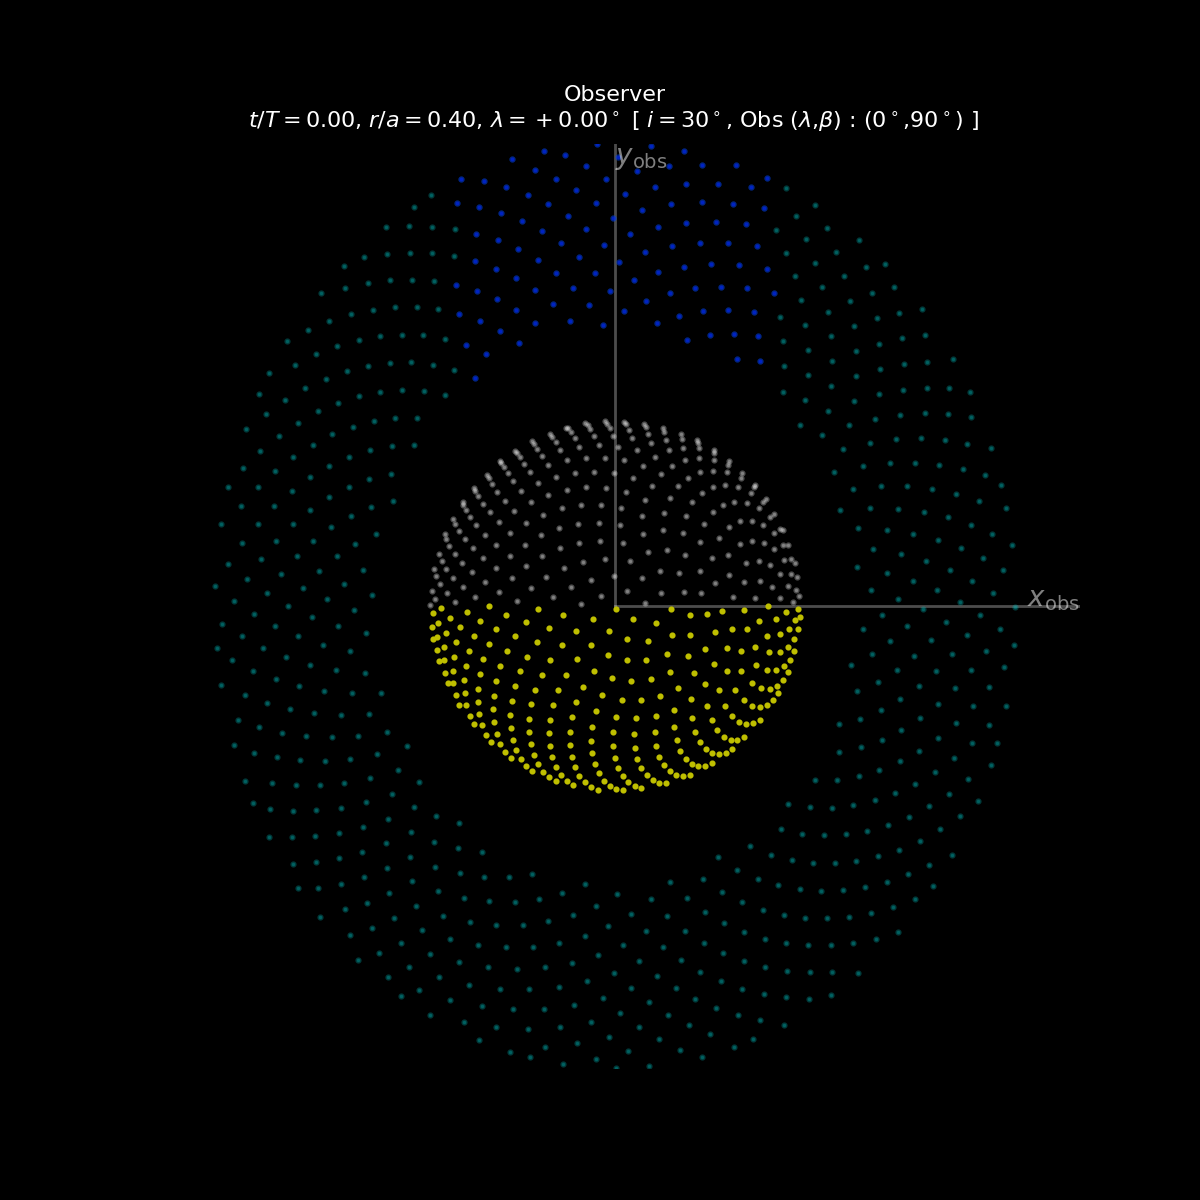

In [1070]:
fig1,fig2,fig3=RP.plotRingedPlanet(showfig=0)
fig2

<IPython.core.display.Javascript object>


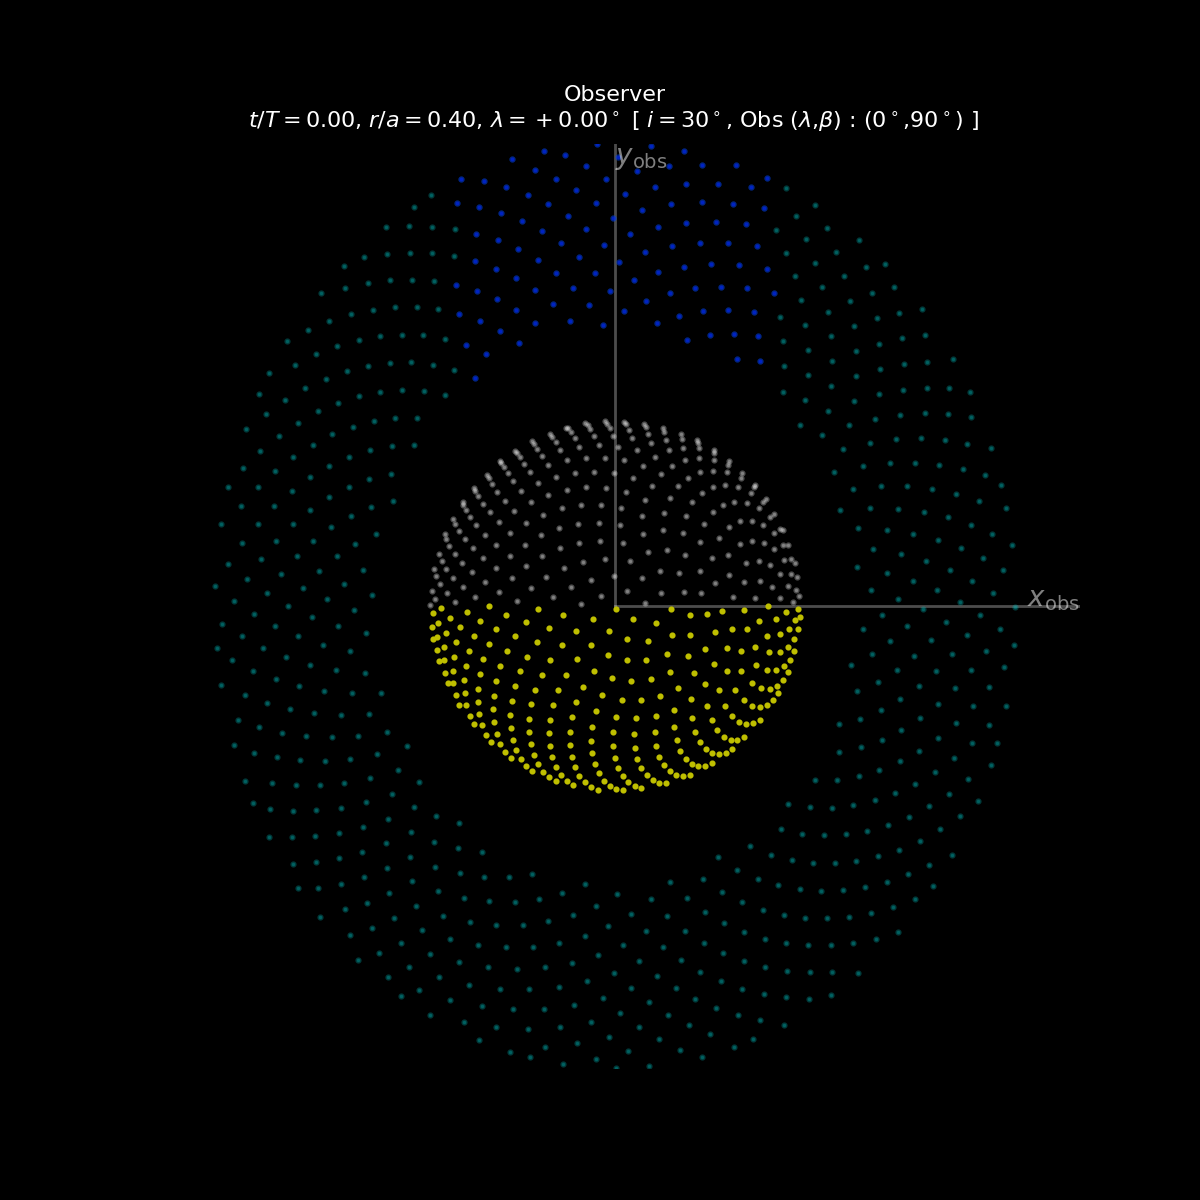

In [1071]:
fig1,fig2,fig3=RP.plotRingedPlanet(showfig=0)
fig2

In [1009]:
RP.Rstar,P.Rstar,RP.Rp,P.Rp,RP.a,P.a,RP.e,P.e,RP.Nr,P.Nr,P.i,RP.i

(0.004649131016042781,
 0.004649131016042781,
 0.08372561142183434,
 0.08372561142183434,
 0.2,
 0.2,
 0.6,
 0.6,
 652,
 652,
 0.5235987755982988,
 0)

<IPython.core.display.Javascript object>


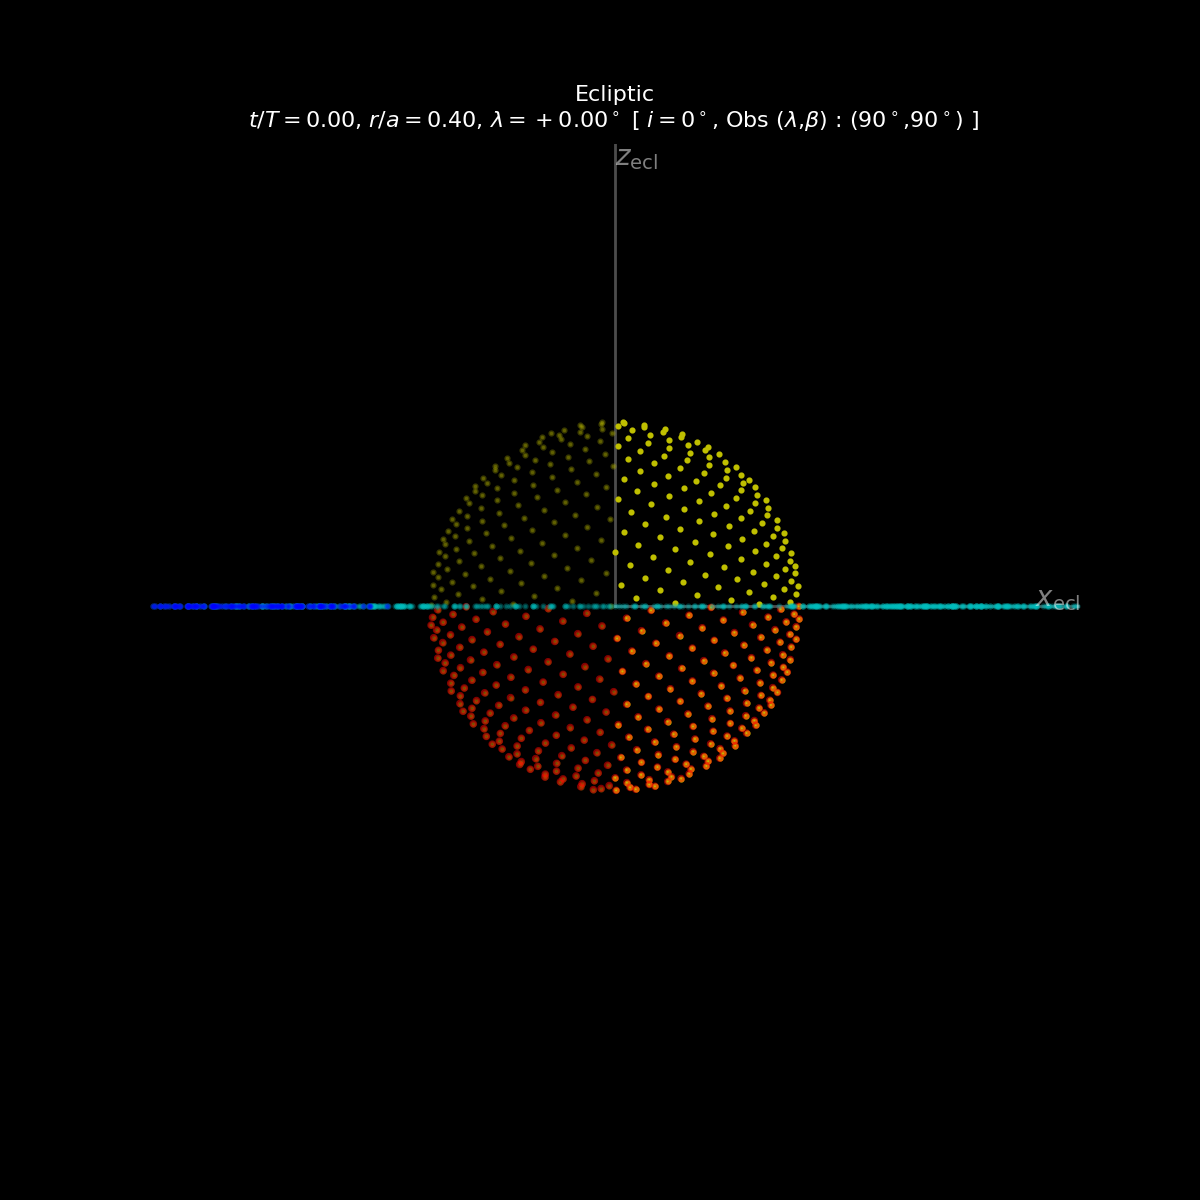

<IPython.core.display.Javascript object>


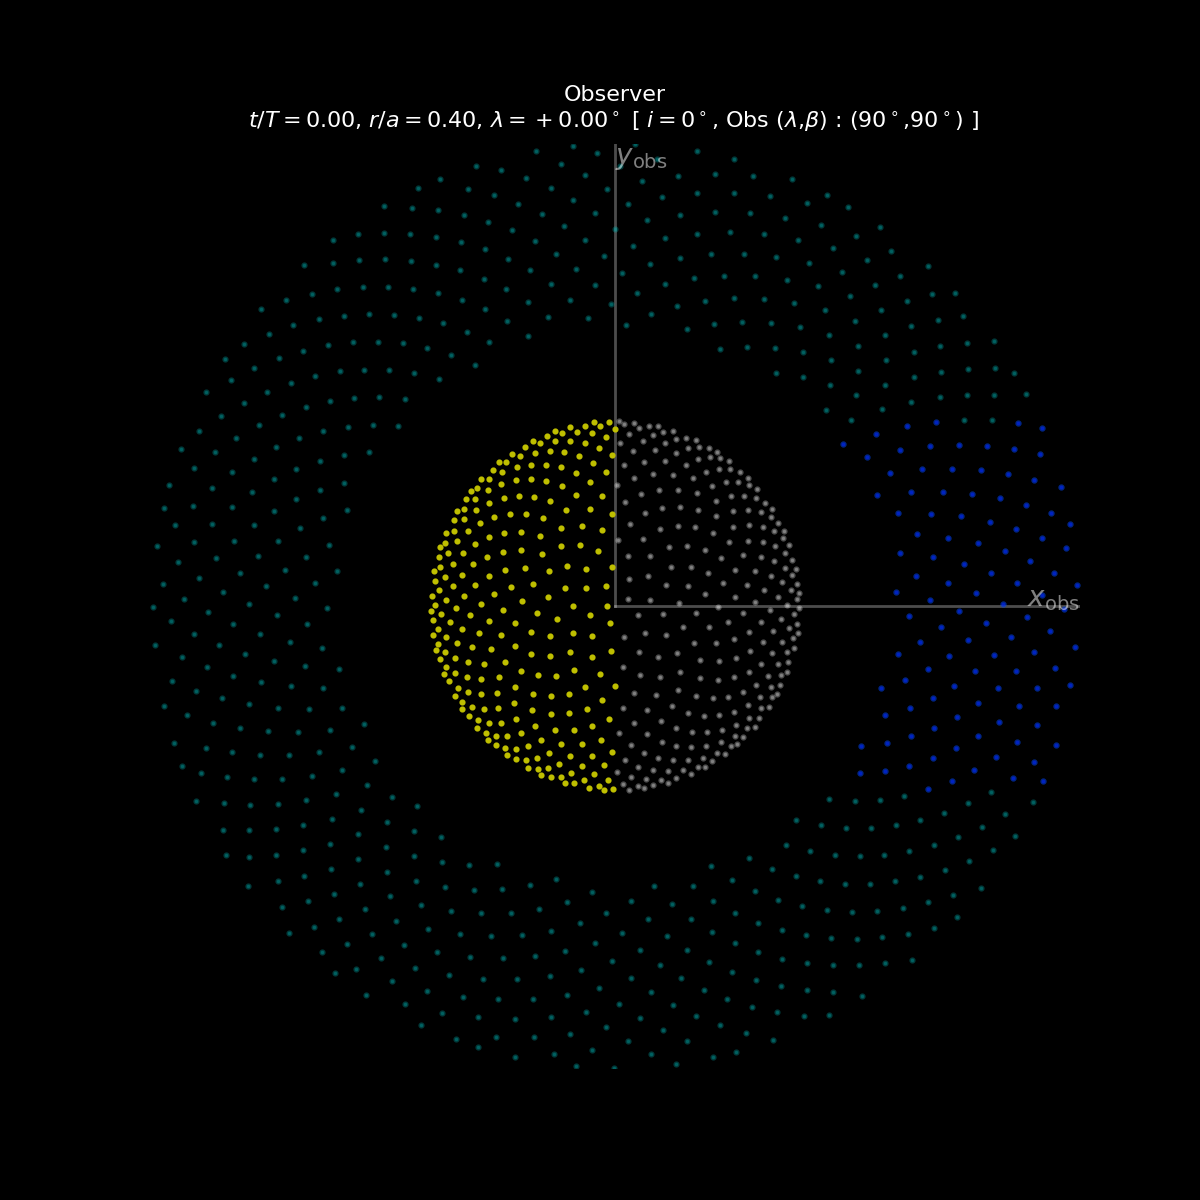

<IPython.core.display.Javascript object>


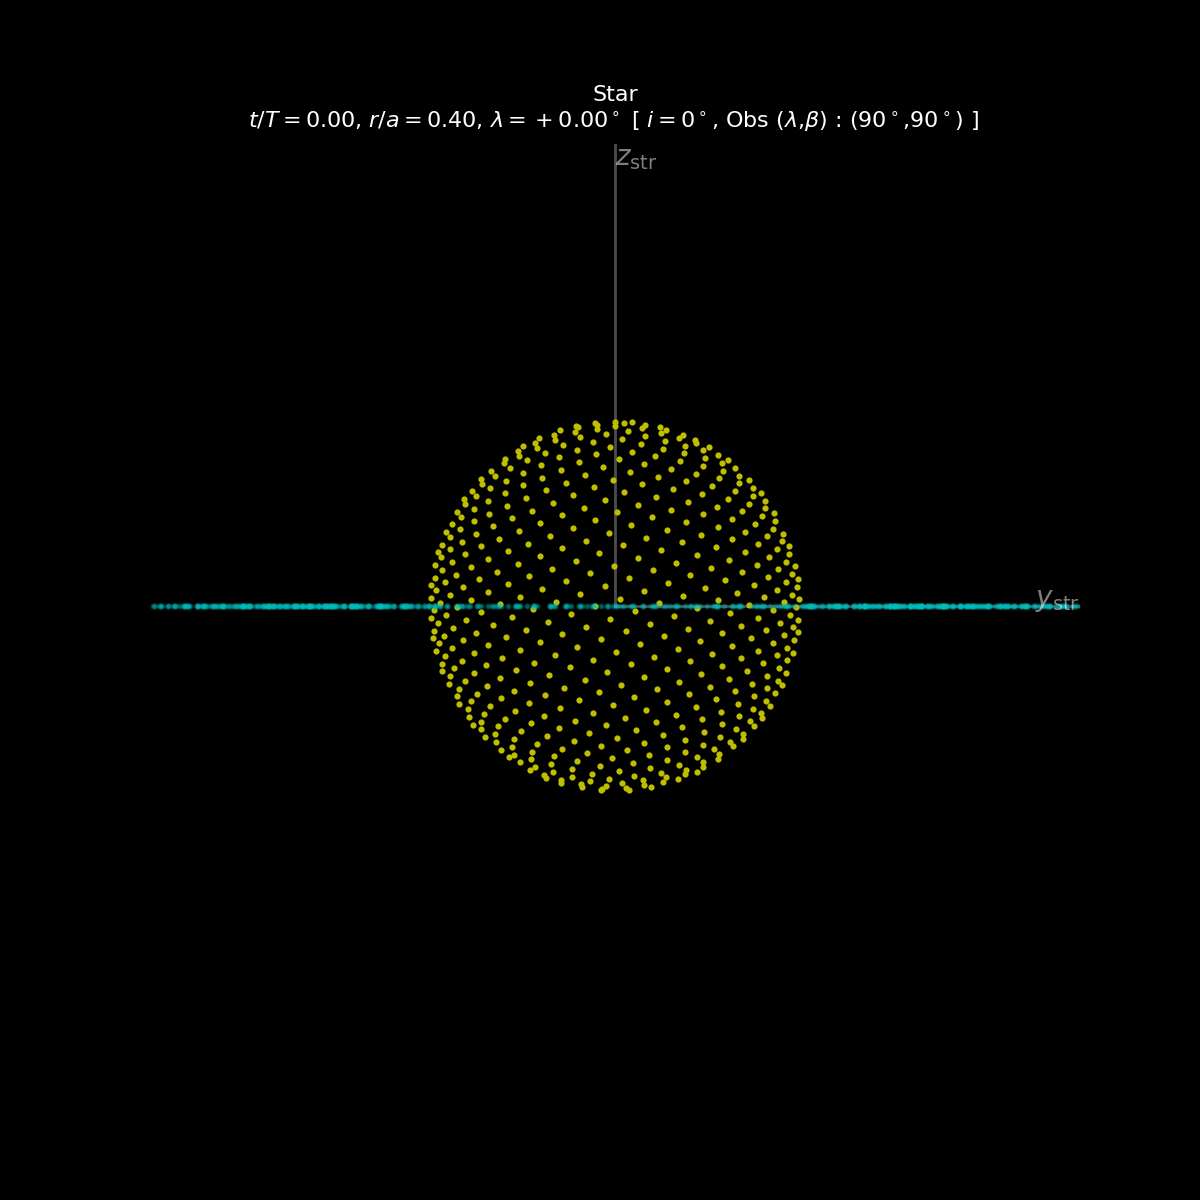

(<Figure size 600x600 with 1 Axes>,
 <Figure size 600x600 with 1 Axes>,
 <Figure size 600x600 with 1 Axes>)

In [1011]:
RP.plotRingedPlanet()

<IPython.core.display.Javascript object>


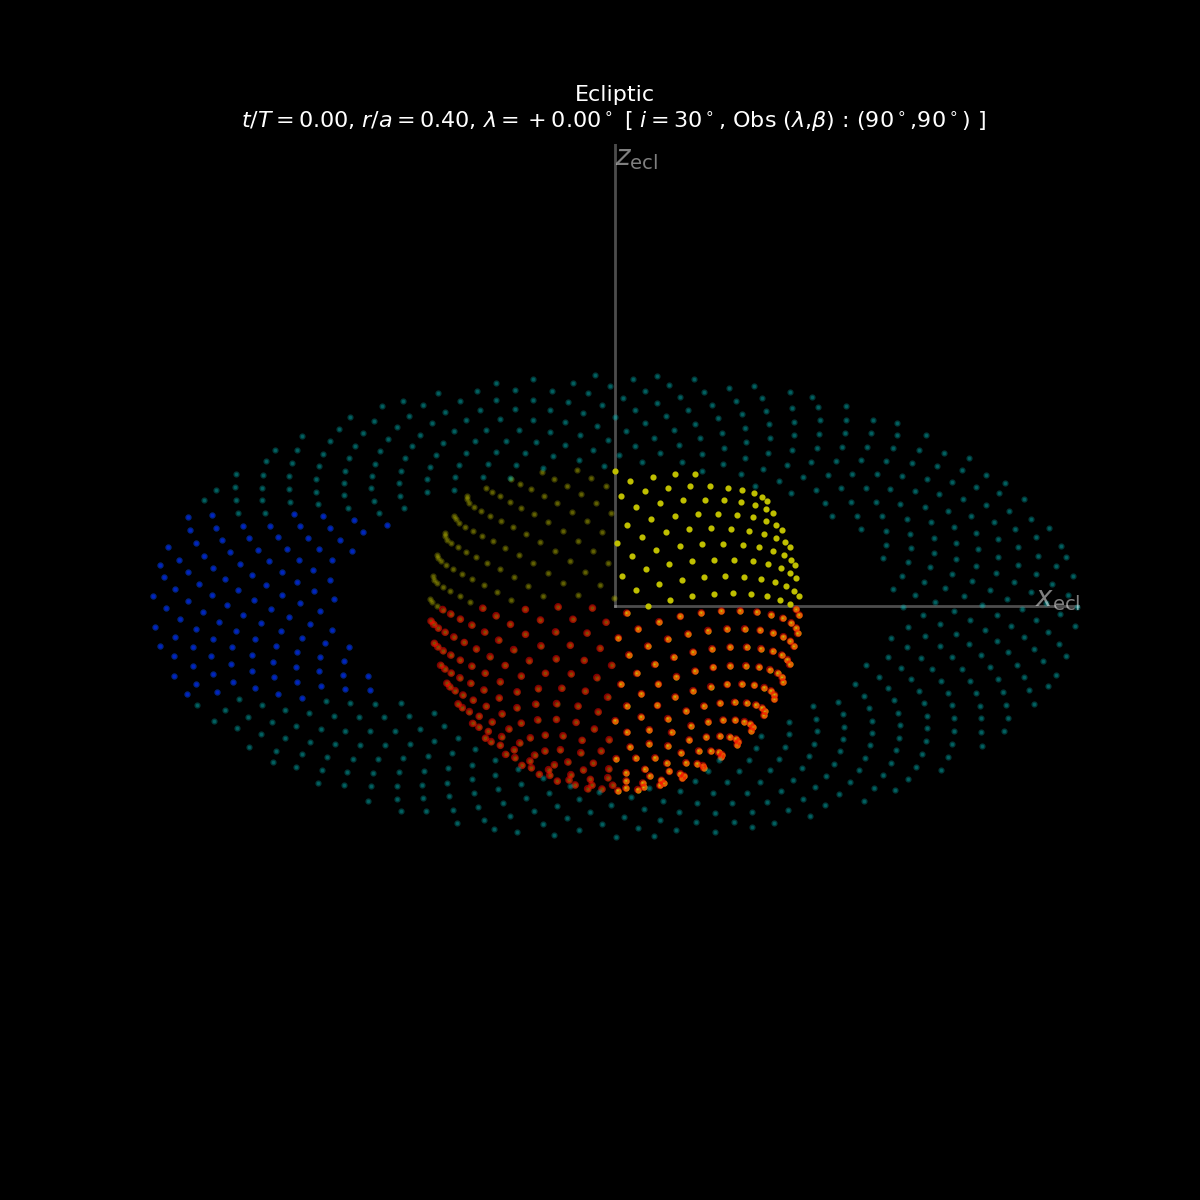

<IPython.core.display.Javascript object>


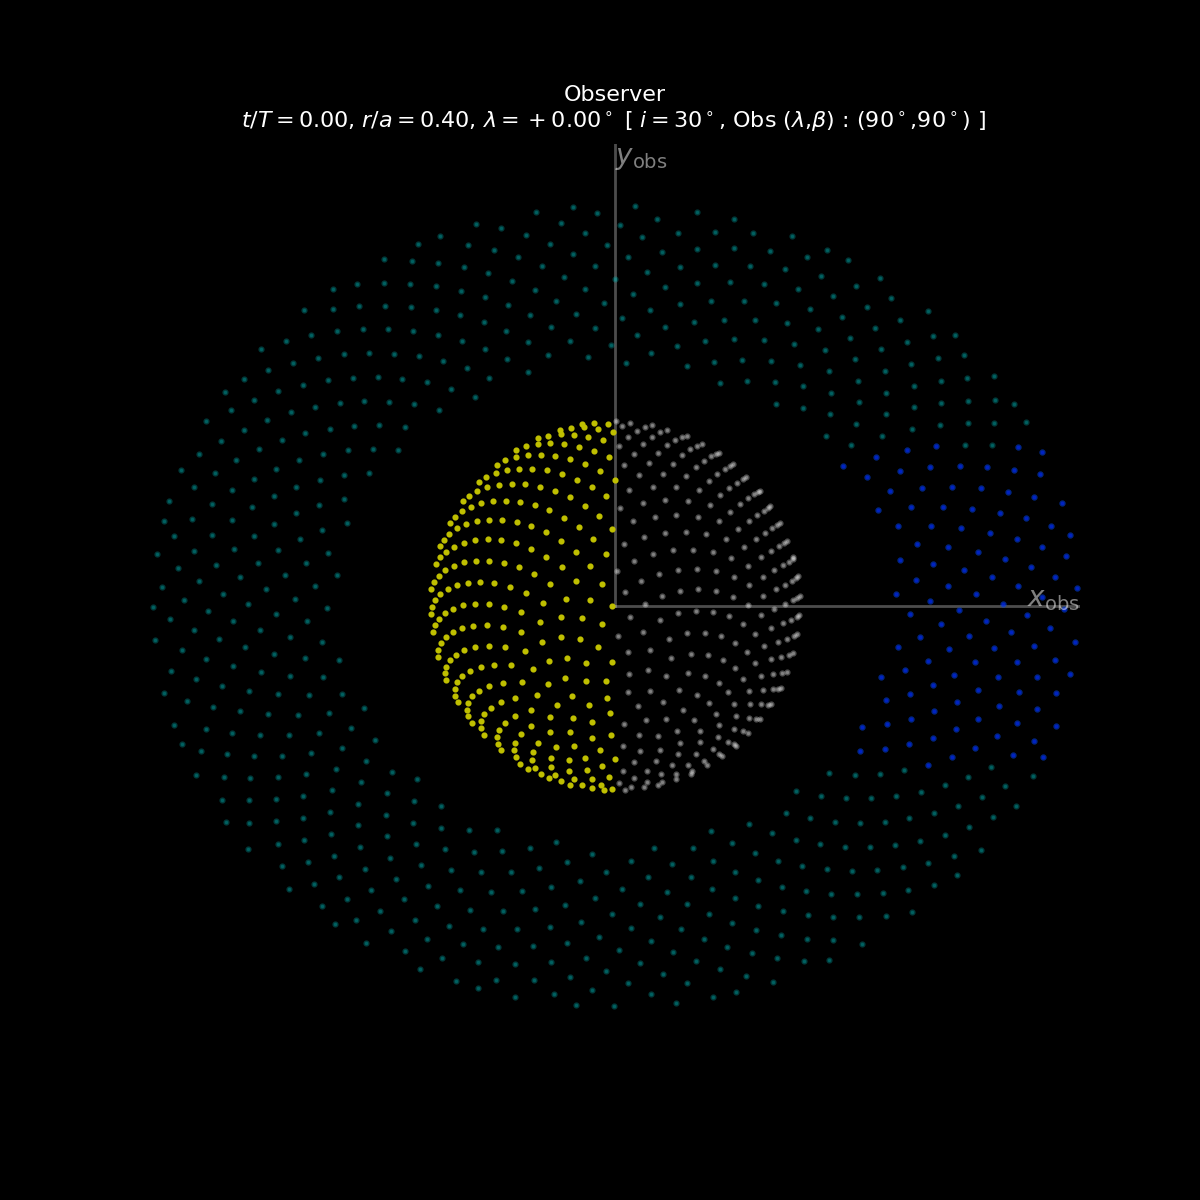

<IPython.core.display.Javascript object>


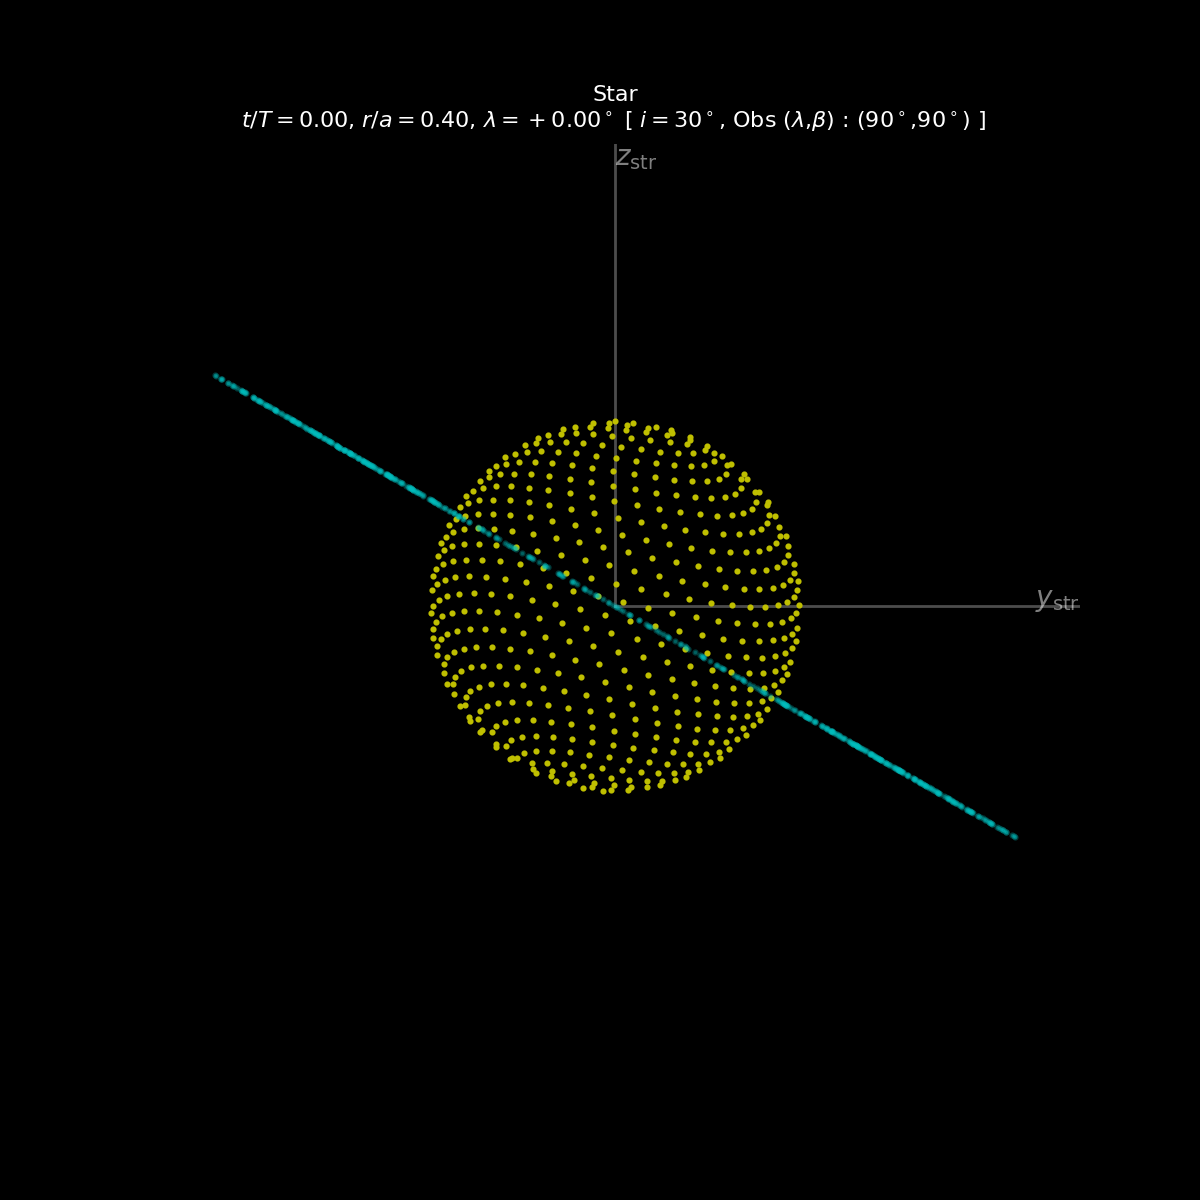

(<Figure size 600x600 with 1 Axes>,
 <Figure size 600x600 with 1 Axes>,
 <Figure size 600x600 with 1 Axes>)

In [1006]:
RP.plotRingedPlanet()

In [889]:
rb.units.convert_G(["m","s","kg"])

6.67408e-11

In [850]:
sys._sim.units,sys._sim.G,sys.RP

({'length': 'au', 'mass': 'msun', 'time': 'yr'},
 39.476926421373,
 <pryngles.base.RingedPlanet at 0x7fb8981e2b20>)

In [857]:
rb.units.convert_length(1,"au","km"),rb.units.convert_time(1,"yr","s")

AttributeError: module 'rebound.units' has no attribute 'convert_time'

In [858]:
rb.units.convert_mass(1,"msun","kg")

1.9884754159665356e+30

In [866]:
rb.units.convert_vel(1,"au","yr","km","s")

4.740470463533348

In [864]:
rb.units.convert_vel?

## Debugging

Battery of test:

1. Individual object creation 

In [1075]:
###########################################################
#Single
print("Star:")
S=Star()
print(S)
#Parameters
S=Star(m=2)
print(S)
#With dictionary
star=dict(m=3.5,R=5.6)
S=Star(**star)
print(S)
###########################################################
print("Planet:")
#Single
P=Planet(center=S)
print(P)
#Parameters
P=Planet(R=2,center=S)
print(P)
#With dictionary
planet=dict(m=0.5,R=0.6)
P=Planet(**planet,center=S)
print(P)
print(S)
###########################################################
print("Ring:")
#Single
R=Ring(center=P)
print(R)
print(P)
#Parameters
R=Ring(fi=3,center=S)
print(R)
print(S)
#With dictionary
ring=dict(i=30*deg)
R=Ring(**ring,center=S)
print(R)
print(P)
###########################################################
print("Observer:")
#Single
O=Observer()
print(O)
#Parameters
O=Observer(beta=60*deg)
print(O)
#With dictionary
observer=dict(beta=30*deg)
O=Observer(**observer)
print(O)

Star:
{'hash': None, 'type': 'Star', 'center': None, 'm': 1, 'R': 0.004649131016042781, 'Prot': 0.1, 'N': 1000, 'childs': [], 'parent': None}
{'hash': None, 'type': 'Star', 'center': None, 'm': 2, 'R': 0.004649131016042781, 'Prot': 0.1, 'N': 1000, 'childs': [], 'parent': None}
{'hash': None, 'type': 'Star', 'center': None, 'm': 3.5, 'R': 5.6, 'Prot': 0.1, 'N': 1000, 'childs': [], 'parent': None}
Planet:
{'hash': None, 'type': 'Planet', 'center': <__main__.Star object at 0x7fb93fd0f280>, 'parent': <__main__.Star object at 0x7fb93fd0f280>, 'm': 0.0002858150109113007, 'R': 0.0003892513368983957, 'Prot': 0.01, 'a': 0.2, 'e': 0.6, 'N': 1000, 'childs': []}
{'hash': None, 'type': 'Planet', 'center': <__main__.Star object at 0x7fb93fd0f280>, 'parent': <__main__.Star object at 0x7fb93fd0f280>, 'm': 0.0002858150109113007, 'R': 2, 'Prot': 0.01, 'a': 0.2, 'e': 0.6, 'N': 1000, 'childs': []}
{'hash': None, 'type': 'Planet', 'center': <__main__.Star object at 0x7fb93fd0f280>, 'parent': <__main__.Star

2. System creation

In [812]:
#Default
sys=System()
print(sys)

{'units': ['Msun', 'au', 'yr'], 'stars': [], 'planets': [], 'rings': [], 'rebound': True, 'Nstars': 0, 'Nplanets': 0, 'Nrings': 0, 'N': 0, 'P': <pryngles.base.RingedPlanet object at 0x7fb92bb44160>}


In [813]:
#Add Star rebound method
sys=System()
sys.addStar(m=2.3,R=4.5)
print(sys.stars[0])
#Add Star with star object
sys=System()
star=Star()
sys.addStar(star=star)
print(sys.stars[0])
#Add Star with dictionary
sys=System()
star=dict(m=3.2,R=5.6)
sys.addStar(**star)
print(sys.stars[0])


{'hash': None, 'type': 'Star', 'center': None, 'm': 2.3, 'R': 4.5, 'Prot': 0.1, 'N': 1000, 'childs': [], 'parent': None}
{'hash': None, 'type': 'Star', 'center': None, 'm': 1, 'R': 1, 'Prot': 0.1, 'N': 1000, 'childs': [], 'parent': None}
{'hash': None, 'type': 'Star', 'center': None, 'm': 3.2, 'R': 5.6, 'Prot': 0.1, 'N': 1000, 'childs': [], 'parent': None}


In [814]:
#Complete
sys=System()
sys.addStar(m=2)
sys.addPlanet(m=1e-2,center=sys.stars[0])
sys.addRing(fi=1.6,fe=3,center=sys.planets[0])
print(sys)
print(sys.stars[0])
print(sys.planets[0])
print(sys.rings[0])

{'units': ['Msun', 'au', 'yr'], 'stars': [<__main__.Star object at 0x7fb92bb2f970>], 'planets': [<__main__.Planet object at 0x7fb8981673d0>], 'rings': [<__main__.Ring object at 0x7fb92bb2ff70>], 'rebound': True, 'Nstars': 1, 'Nplanets': 1, 'Nrings': 1, 'N': 3, 'P': <pryngles.base.RingedPlanet object at 0x7fb92bb2fe80>}
{'hash': None, 'type': 'Star', 'center': None, 'm': 2, 'R': 1, 'Prot': 0.1, 'N': 1000, 'childs': [<__main__.Planet object at 0x7fb8981673d0>], 'parent': None}
{'hash': None, 'type': 'Planet', 'center': <__main__.Star object at 0x7fb92bb2f970>, 'parent': <__main__.Star object at 0x7fb92bb2f970>, 'm': 0.01, 'R': 0.1, 'Prot': 0.01, 'N': 1000, 'childs': [<__main__.Ring object at 0x7fb92bb2ff70>]}
{'hash': None, 'type': 'Ring', 'center': <__main__.Planet object at 0x7fb8981673d0>, 'parent': <__main__.Planet object at 0x7fb8981673d0>, 'fi': 1.6, 'fe': 3, 'N': 1000, 'childs': [], 'ri': 0.16000000000000003, 're': 0.30000000000000004}


# Convert

In [60]:
%%javascript
IPython.notebook.kernel.execute('FILE=\"' + IPython.notebook.notebook_name + '\"')

<IPython.core.display.Javascript object>

In [61]:
!make -C .. DEVFILES=dev/{FILE} convert

Converting iPython Notebooks dev/pryngles-_template.ipynb...
Analysing file pryngles-_template.ipynb:
	Directory: src//pryngles
	Filename: _template
	Target object: src//pryngles/_template.py
	Converting from ipynb dev/pryngles-_template.ipynb to python src//pryngles/_template.py...
	Processing magic commands...
	Triming end...
	Triming test...
	Using as template src/.temp
Completed.


In [3]:
# Converted